In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = '../results/all_model_evaluations.csv'
df = pd.read_csv(path)

In [ ]:
# Data Statistics (per window)
data_statistics_per_window = df.groupby('window').describe()

# Function to format data to 2 decimal places
def format_data(df):
    formatted_df = df.copy()
    
    # Format all numeric values to 2 decimal places
    for i, col in enumerate(formatted_df.columns):
        if i == 0:
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.0f}")
        else:
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2f}")
    return formatted_df

# RMSE Formatting
print(f"=== Data Statistics (per window) RMSE ===")
rmse = format_data(data_statistics_per_window['rmse'].T)
print(rmse)

# MAPE Formatting
print(f"\n=== Data Statistics (per window) MAPE ===")
mape = format_data(data_statistics_per_window['mape'].T)
print(mape)

# R² Formatting
print(f"\n=== Data Statistics (per window) R² ===")
r_squared = format_data(data_statistics_per_window['r_squared'].T)
print(r_squared)


=== Data Statistics (per window) RMSE ===
window        5         8         11        14        17
count   11060.00  11060.00  11060.00  11060.00  11060.00
mean        8.60      6.70      5.46      4.55      3.85
std         8.73      7.19      6.21      5.51      4.86
min         0.00      0.00      0.00      0.00      0.00
25%         3.39      2.43      1.86      1.46      1.14
50%         6.13      4.64      3.59      2.94      2.42
75%        10.70      8.27      6.70      5.56      4.75
max       114.91     99.21     99.65     95.15     86.79

=== Data Statistics (per window) MAPE ===
window        5         8         11        14        17
count   11060.00  11060.00  11060.00  11060.00  11060.00
mean        0.13      0.11      0.09      0.08      0.07
std         0.22      0.19      0.17      0.16      0.14
min         0.00      0.00      0.00      0.00      0.00
25%         0.04      0.03      0.02      0.02      0.01
50%         0.08      0.06      0.05      0.04      0.03
75%

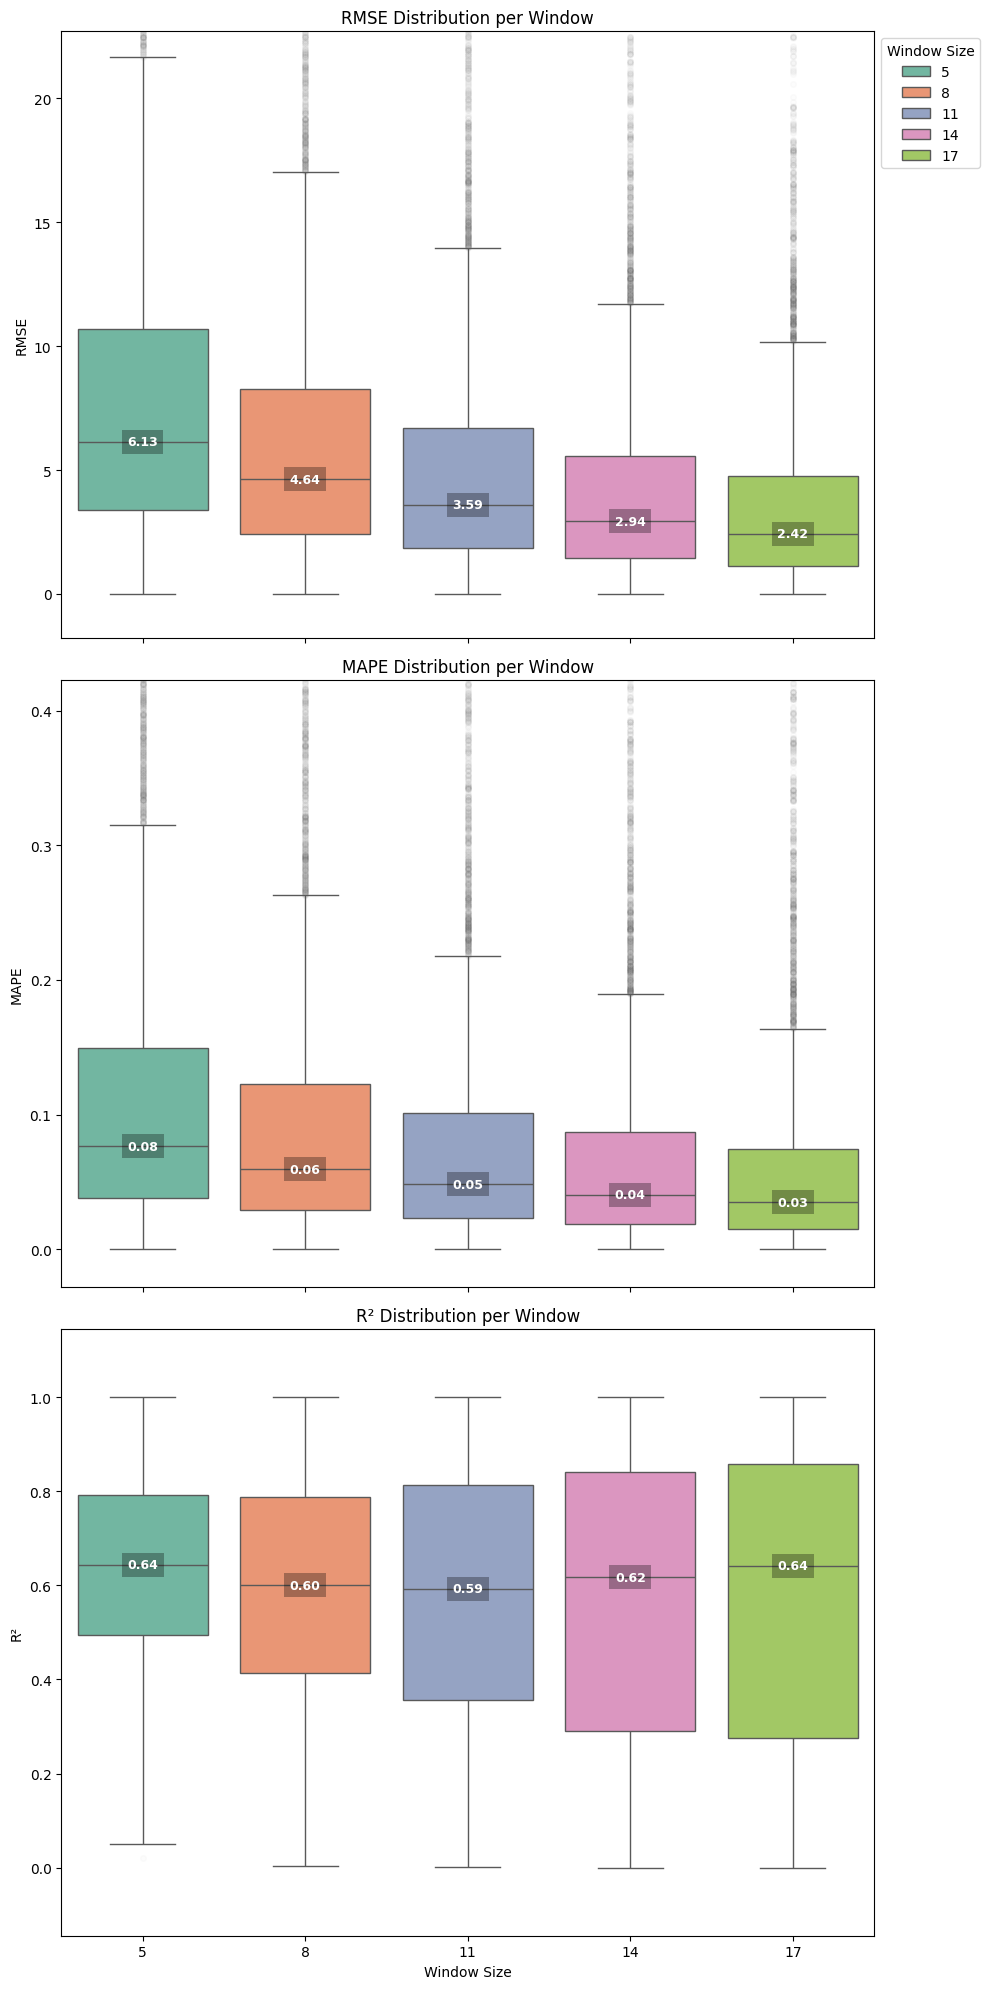

In [50]:
# the world's prettiest boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Dynamic y-limits using IQR
def get_dynamic_ylim(series):
    eiq = (series.quantile(0.75) - series.quantile(0.25)) / 3
    eiq_normalized = eiq / (series.max() - series.min() or 1)
    y_min = series.min() - eiq
    y_max = series.quantile(0.9725) + (eiq_normalized)
    return y_min, y_max

# Calculate y-limits
rmse_ylim = get_dynamic_ylim(df['rmse'])
mape_ylim = get_dynamic_ylim(df['mape'])
r2_ylim   = get_dynamic_ylim(df['r_squared'])

# Define custom outlier style
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.025)

# Define color palette
unique_windows = sorted(df['window'].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_windows))

fig, axs = plt.subplots(3, 1, figsize=(10, 20), sharex=True)

# Helper function to add median labels
def annotate_medians(ax, data_col):
    medians = df.groupby("window")[data_col].median()
    for i, window in enumerate(unique_windows):
        ax.text(i, medians[window], f"{medians[window]:.2f}",
                ha='center', va='center', fontweight='bold', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.3, edgecolor='none'))

# RMSE (Remove internal legend and add external one)
sns.boxplot(data=df, x='window', y='rmse', ax=axs[0], palette=palette, hue='window', flierprops=flierprops, legend=True)
axs[0].set_title('RMSE Distribution per Window')
axs[0].set_ylabel('RMSE')
axs[0].set_ylim(rmse_ylim)
annotate_medians(axs[0], 'rmse')

# Manually add legend for the first plot
handles, labels = axs[0].get_legend_handles_labels()
# add legend title
legend_title = 'Window Size'
axs[0].legend(handles, labels, title=legend_title, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

# MAPE (No legend)
sns.boxplot(data=df, x='window', y='mape', ax=axs[1], palette=palette, hue='window', flierprops=flierprops, legend=False)
axs[1].set_title('MAPE Distribution per Window')
axs[1].set_ylabel('MAPE')
axs[1].set_ylim(mape_ylim)
annotate_medians(axs[1], 'mape')

# R² (No legend)
sns.boxplot(data=df, x='window', y='r_squared', ax=axs[2], palette=palette, hue='window', flierprops=flierprops, legend=False)
axs[2].set_title('R² Distribution per Window')
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Window Size')
axs[2].set_ylim(r2_ylim)
annotate_medians(axs[2], 'r_squared')

plt.tight_layout()
plt.show()

# Save the image as png with a very good resolution and quality
fig.savefig('boxplots.png', dpi=300, bbox_inches='tight')

